In [44]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'KDEF/KDEF/Train', 
    shuffle=True,
    batch_size=32,
)

print(len(dataset))

Found 4409 files belonging to 2 classes.
138


In [15]:
class_titles = dataset.class_names
print(class_titles)

['NoStress', 'Stress']


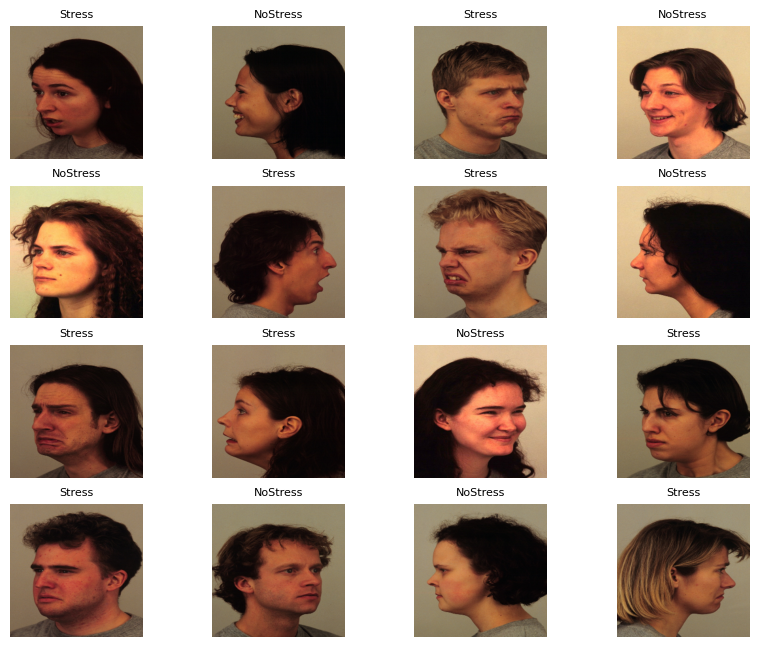

In [27]:
plt.figure(figsize=(10, 10))

i=0
for batch, label in dataset.take(1):
    labels = label.numpy()
    for i in range(16):
        ax = plt.subplot(5, 4, i + 1)
        plt.axis('off')
        plt.title(class_titles[labels[i]], fontsize = 8)
        plt.imshow(batch[i].numpy().astype("uint8"))

In [31]:
model = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

model.build(input_shape=(32, 256, 256, 3))
model.summary()

C:\Users\gorde\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    dataset,
    batch_size=32,
    verbose=1,
    epochs=10,
)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 67s 467ms/step - accuracy: 0.6087 - loss: 0.6594 
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 67s 486ms/step - accuracy: 0.7258 - loss: 0.5786 
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 68s 494ms/step - accuracy: 0.7670 - loss: 0.5034 
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 71s 511ms/step - accuracy: 0.7731 - loss: 0.4847 
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 71s 513ms/step - accuracy: 0.8332 - loss: 0.3540 
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 71s 515ms/step - accuracy: 0.8671 - loss: 0.2850 
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 70s 507ms/step - accuracy: 0.8921 - loss: 0.2480 
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 70s 509ms/step - accuracy: 0.9140 - loss: 0.1950 
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 68s 495ms/step - accuracy: 0.9248 - loss: 0.1792 
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 75s 542ms/step - accuracy: 0.9362 - loss: 0.1642 


In [35]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    'KDEF/KDEF/Test', 
    batch_size=32,
)

Found 1891 files belonging to 2 classes.


In [36]:
model.evaluate(dataset_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.9087 - loss: 0.2469


[0.2652903199195862, 0.8989952206611633]

In [47]:
dataset_test.class_names

['NoStress', 'Stress']

In [53]:
to_test_dataset = dataset_test.skip(5).take(1)

for images_batch, labels_batch in to_test_dataset:
    results = model.predict(to_test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
(32, 256, 256, 3)


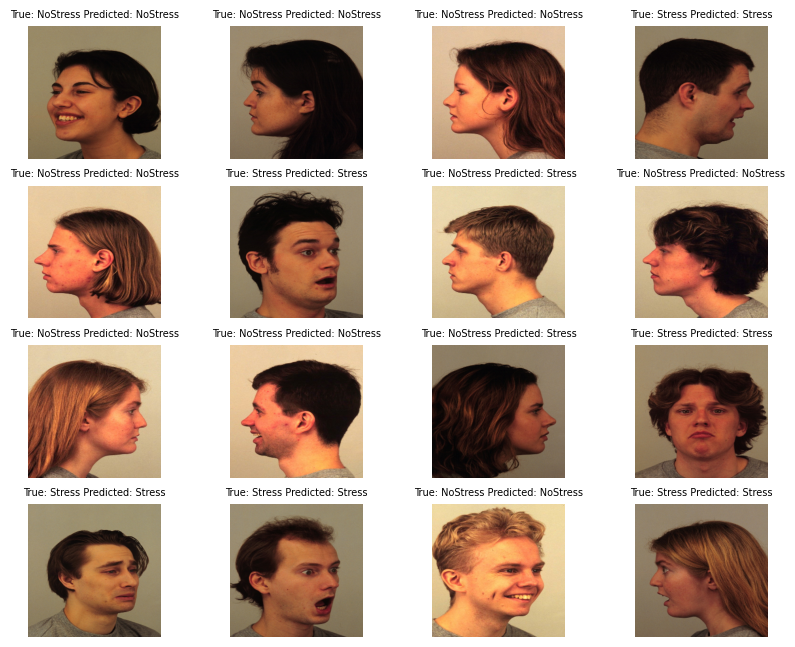

In [73]:
plt.figure(figsize=(10, 10))

i=0
for batch, label in to_test_dataset:
    results = model.predict(batch)
    print(batch.shape)
    labels = label.numpy()
    for i in range(16):
        predicted = np.argmax(results[i])
        ax = plt.subplot(5, 4, i + 1)
        plt.axis('off')
        plt.title('True: ' + class_titles[labels[i]] + ' Predicted: ' + class_titles[predicted], fontsize = 7)
        plt.imshow(batch[i].numpy().astype("uint8"))